https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast/data?select=stores.csv

HANDLING MISSING VALUE METHOD AKAN DIGANTI DENGAN LINEAR INTERPOLATION

#IMPORT LIBRARY & DATA

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [7]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
features = pd.read_csv('/content/features.csv')
stores = pd.read_csv('/content/stores.csv')

In [8]:
print("Train shape   :", train.shape)
print("Test shape    :", test.shape)
print("Features shape:", features.shape)
print("Stores shape  :", stores.shape)


Train shape   : (421570, 5)
Test shape    : (115064, 4)
Features shape: (8190, 12)
Stores shape  : (45, 3)


In [9]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [11]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [13]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [15]:
stores.head(7)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713


In [16]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [17]:
def missing_check(df, name):
  print(f"\nMissing Values in {name}:")
  print(df.isnull().sum()[df.isnull().sum() > 0])


missing_check(train, "Train")
missing_check(features, "features")
missing_check(stores, "stores")



Missing Values in Train:
Series([], dtype: int64)

Missing Values in features:
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
dtype: int64

Missing Values in stores:
Series([], dtype: int64)


In [18]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

print("Train date range:", train['Date'].min(), "to", train['Date'].max())
print("Test date range :", test['Date'].min(), "to", test['Date'].max())


Train date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
Test date range : 2012-11-02 00:00:00 to 2013-07-26 00:00:00


**Sebelum menggabungkan data, setiap file di inspeksi satu per satu untuk memvalidasi skema, konsistensi, tipe data, missing value, dan cover waktu.**

##Memastikan Tipe data secara akurat (Datetime & Numeric)

In [19]:
#KOLOM TANGGAL
for df in [train,test,features]:
  df['Date'] = pd.to_datetime(df['Date'])

In [20]:
#Kolom kategori & numeric
for col in ['Store']:
  train[col] = train[col].astype(int)
  test[col] = test[col].astype(int)

##Mengatasi Missing Value (Features)

In [21]:
features.isnull().sum()[features.isnull().sum() > 0]


,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585
Unemployment,585


In [22]:
details = {'unique':features.nunique(),
              'dtype':features.dtypes,
             'null':features.isna().sum(),
             'null %':features.isna().sum()/len(features)
             }
details = pd.DataFrame(details)
details

,unique,dtype,null,null %
Store,45,int64,0,0.000000
Date,182,datetime64[ns],0,0.000000
Temperature,4178,float64,0,0.000000
Fuel_Price,1011,float64,0,0.000000
MarkDown1,4023,float64,4158,0.507692
MarkDown2,2715,float64,5269,0.643346
MarkDown3,2885,float64,4577,0.558852
MarkDown4,3405,float64,4726,0.577045
MarkDown5,4045,float64,4140,0.505495
CPI,2505,float64,585,0.071429


Penjelasan Kolom :
1.   Markdown : Data anonim terkait potongan harga promosi yang sedang dijalankan Walmart.

2.   CPI : Consumer price index

3. unemployment rate





In [23]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features[markdown_cols] = features[markdown_cols].fillna(0)

features['CPI'] = features['CPI'].fillna(method='ffill')
features['Unemployment'] = features['Unemployment'].fillna(method='ffill')


In [24]:
features.isnull().sum()[features.isnull().sum() > 0]


,0


##Cek Duplikasi

In [25]:
print("Train duplicates:", train.duplicated().sum())
print("Features duplicates:", features.duplicated().sum())
print("Stores duplicates:", stores.duplicated().sum())


Train duplicates: 0
Features duplicates: 0
Stores duplicates: 0


Nilai yang hilang pada kolom markdown diisi dengan angka 0, dengan asumsi bahwa tidak ada promosi.

sedangkan CPI dan unemployment diisi dengan forward filled(ffil) untuk menjaga kesinambungan temporal

##Data Prep

In [26]:
#Merge train data
train_merged = train.merge(
    stores,
    on='Store',
    how='left'
)

print("Train original shape :", train.shape)
print("Train merged shape   :", train_merged.shape)


Train original shape : (421570, 5)
Train merged shape   : (421570, 7)


Jumlah baris sama

In [27]:
train_final = train_merged.merge(
    features,
    on=['Store', 'Date', 'IsHoliday'],
    how='left'
)

print("Train final shape:", train_final.shape)


Train final shape: (421570, 16)


In [28]:
train_final.isnull().sum()[train_final.isnull().sum() > 0]


,0


In [29]:
train_final.columns


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [30]:
#Merge test data
test_merged = test.merge(
    stores,
    on='Store',
    how='left'
)

test_final = test_merged.merge(
    features,
    on=['Store', 'Date', 'IsHoliday'],
    how='left'
)

print("Test final shape:", test_final.shape)


Test final shape: (115064, 15)


data digabungkan menggunakan indikator toko, tanggal, dan hari libur sebagai kunci. Kumpulan data pelatihan dan pengujian diproses secara terpisah untuk mencegah kebocoran data dan memastikan pengaturan peramalan yang realistis.

#EXPLORATORY DATA ANALYSIS (EDA)

In [31]:
import pandas as pd

pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
#Agar tampilan output full display

In [32]:
train_final

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,"24,924",False,A,151315,42,3,0,0,0,0,0,211,8
1,1,1,2010-02-12,"46,039",True,A,151315,39,3,0,0,0,0,0,211,8
2,1,1,2010-02-19,"41,596",False,A,151315,40,3,0,0,0,0,0,211,8
3,1,1,2010-02-26,"19,404",False,A,151315,47,3,0,0,0,0,0,211,8
4,1,1,2010-03-05,"21,828",False,A,151315,46,3,0,0,0,0,0,211,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508,False,B,118221,65,4,"4,557",21,2,"1,601","3,288",192,9
421566,45,98,2012-10-05,628,False,B,118221,65,4,"5,047",0,19,"2,253","2,340",192,9
421567,45,98,2012-10-12,"1,061",False,B,118221,54,4,"1,956",0,8,599,"3,991",192,9
421568,45,98,2012-10-19,760,False,B,118221,56,4,"2,004",0,3,438,"1,537",192,9


In [33]:
test_final

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55,3,"6,766","5,148",51,"3,640","2,737",223,7
1,1,1,2012-11-09,False,A,151315,61,3,"11,421","3,371",40,"4,647","6,154",223,7
2,1,1,2012-11-16,False,A,151315,53,3,"9,696",292,104,"1,133","6,613",224,7
3,1,1,2012-11-23,True,A,151315,56,3,884,4,"74,910",210,303,224,7
4,1,1,2012-11-30,False,A,151315,52,3,"2,460",0,"3,838",151,"6,966",224,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76,4,"4,842",975,3,"2,450","3,170",194,8
115060,45,98,2013-07-05,False,B,118221,78,4,"9,090","2,269",583,"5,797","1,515",194,8
115061,45,98,2013-07-12,False,B,118221,79,4,"3,790","1,827",86,745,"2,150",194,8
115062,45,98,2013-07-19,False,B,118221,83,4,"2,961","1,047",204,363,"1,059",194,8


In [34]:
train_final['Weekly_Sales'].describe()


,Weekly_Sales
count,"421,570"
mean,"15,981"
std,"22,711"
min,"-4,989"
25%,"2,080"
50%,"7,612"
75%,"20,206"
max,"693,099"


Data Weekly Sales menunjukkan distribusi yang sangat condong ke kanan (right-skewed) dengan tingkat volatilitas yang tinggi serta keberadaan outlier yang ekstrem. Nilai penjualan negatif yang muncul kemungkinan merepresentasikan adanya retur barang atau penyesuaian pencatatan (accounting adjustment), bukan penurunan permintaan secara aktual.

Sementara itu, lonjakan penjualan yang sangat tinggi diduga kuat dipicu oleh event tertentu, seperti periode Natal, yang secara konsisten menghasilkan spike signifikan. Karakteristik data ini mengindikasikan bahwa model forecasting tidak dapat mengandalkan asumsi distribusi normal atau pola musiman yang stabil, melainkan perlu memanfaatkan fitur berbasis histori penjualan (lag features) serta pendekatan yang sensitif terhadap event tertentu (event-aware features).

##Analisis mingguan

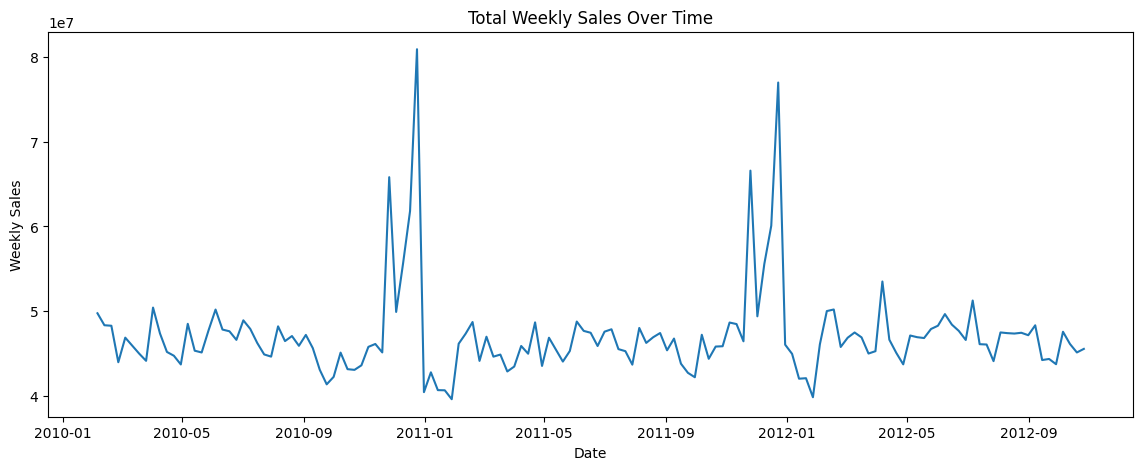

In [35]:
weekly_sales = (
    train_final
    .groupby('Date')['Weekly_Sales']
    .sum()
    .reset_index()
)
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'])
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()


##Analisis bulanan

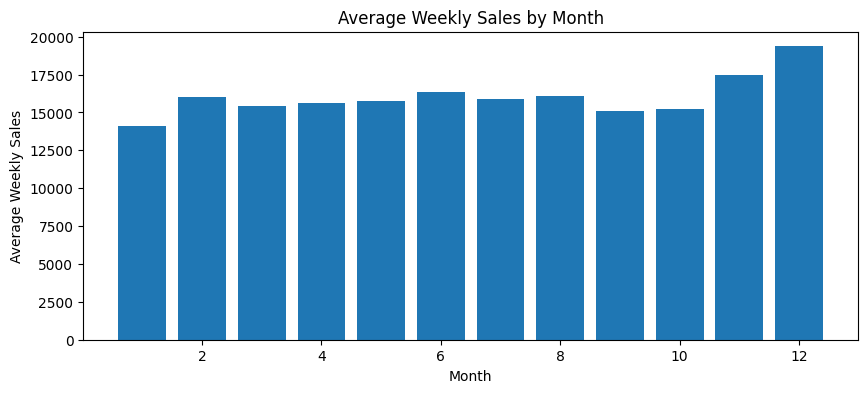

In [36]:
train_final['Month'] = train_final['Date'].dt.month

monthly_sales = (
    train_final
    .groupby('Month')['Weekly_Sales']
    .mean()
    .reset_index()
)
plt.figure(figsize=(10,4))
plt.bar(monthly_sales['Month'], monthly_sales['Weekly_Sales'])
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()


Analisis Holiday Vs Non-Holiday

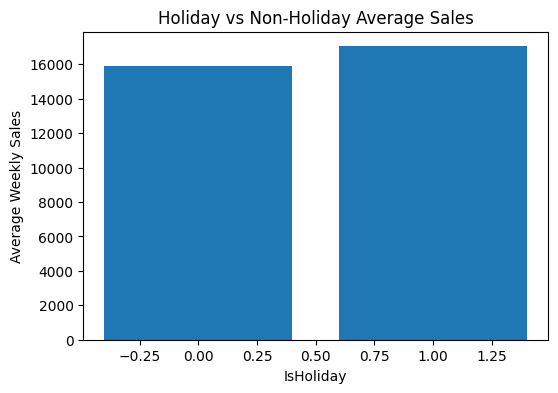

In [37]:
holiday_sales = (
    train_final
    .groupby('IsHoliday')['Weekly_Sales']
    .mean()
    .reset_index()
)
plt.figure(figsize=(6,4))
plt.bar(holiday_sales['IsHoliday'], holiday_sales['Weekly_Sales'])
plt.title('Holiday vs Non-Holiday Average Sales')
plt.xlabel('IsHoliday')
plt.ylabel('Average Weekly Sales')
plt.show()


##Store Perfomance sales

In [38]:
store_sales = (
    train_final
    .groupby('Store')['Weekly_Sales']
    .sum()
    .reset_index()
    .sort_values(by='Weekly_Sales', ascending=False)
)
store_sales.head()


,Store,Weekly_Sales
19,20,"301,397,792"
3,4,"299,543,953"
13,14,"288,999,911"
12,13,"286,517,704"
1,2,"275,382,441"


##Store Type analysis

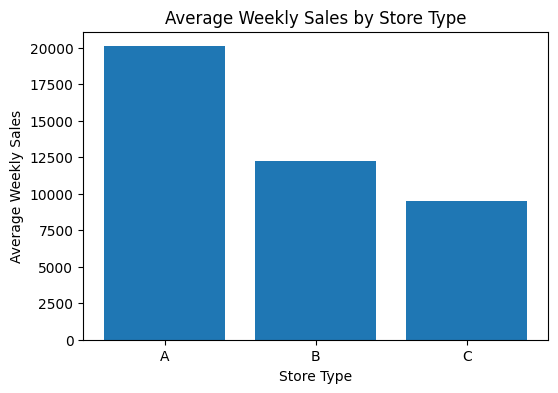

In [39]:
type_sales = (
    train_final
    .groupby('Type')['Weekly_Sales']
    .mean()
    .reset_index()
)
plt.figure(figsize=(6,4))
plt.bar(type_sales['Type'], type_sales['Weekly_Sales'])
plt.title('Average Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')
plt.show()


##Dapartment Analysis

In [40]:
top_dept = (
    train_final
    .groupby('Dept')['Weekly_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_dept


,Weekly_Sales
Dept,
92,"483,943,342"
95,"449,320,163"
38,"393,118,137"
72,"305,725,152"
90,"291,068,464"
40,"288,936,022"
2,"280,611,174"
91,"216,781,706"
13,"197,321,570"


INSIGHT : ......

##Year Over Year pattern

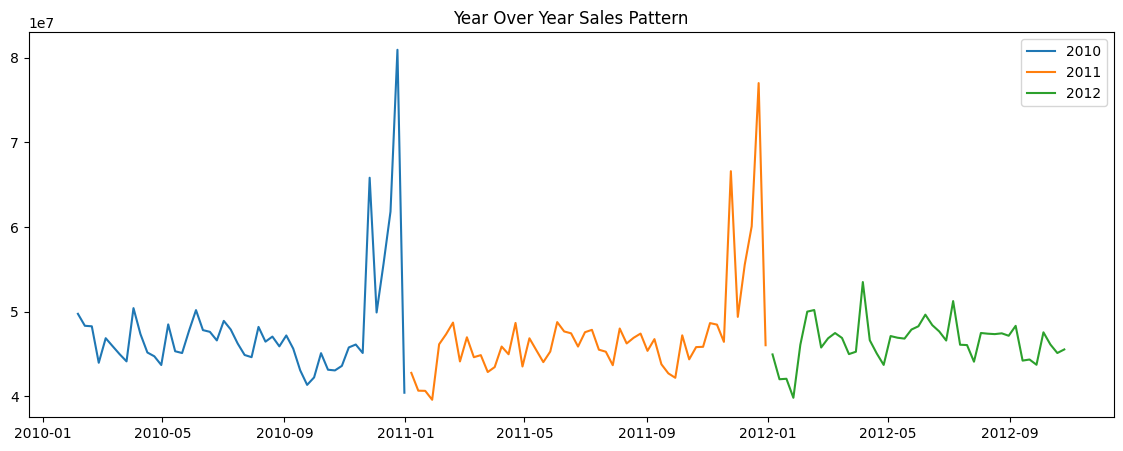

In [41]:
train_final['Year'] = train_final['Date'].dt.year

yearly_pattern = (
    train_final
    .groupby(['Year','Date'])['Weekly_Sales']
    .sum()
    .reset_index()
)
plt.figure(figsize=(14,5))
for year in yearly_pattern['Year'].unique():
  data = yearly_pattern[yearly_pattern['Year']==year]
  plt.plot(data['Date'], data['Weekly_Sales'], label=str(year))

plt.legend()
plt.title('Year Over Year Sales Pattern')
plt.show()

##Holiday Impact

In [42]:
holiday_avg = train_final[train_final['IsHoliday'] == True]['Weekly_Sales'].mean()
nonholiday_avg = train_final[train_final['IsHoliday'] == False]['Weekly_Sales'].mean()

holiday_lift = holiday_avg / nonholiday_avg
holiday_lift


np.float64(1.0713380521970868)

Holiday dibawah 1.2

##Volatilitas Penjualan

In [43]:
cv_store = (
    train_final
    .groupby('Store')['Weekly_Sales']
    .agg(['mean', 'std'])
)
cv_store['CV'] = cv_store['std'] / cv_store['mean']
cv_store.sort_values('CV').head()


,mean,std,CV
Store,,,
23,"19,776","20,897",1
11,"19,277","20,392",1
6,"21,913","23,633",1
8,"13,133","15,132",1
21,"11,283","13,030",1


##Dapartment Dominance

In [44]:
dept_sales = (
    train_final
    .groupby('Dept')['Weekly_Sales']
    .sum()
    .sort_values(ascending=False)
)

pareto = dept_sales.cumsum() / dept_sales.sum()
pareto.head(10)


,Weekly_Sales
Dept,
92,0
95,0
38,0
72,0
90,0
40,0
2,0
91,0
13,0


In [45]:
train_final[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()


,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1,-0,-0,-0,-0
Temperature,-0,1,0,0,0
Fuel_Price,-0,0,1,-0,-0
CPI,-0,0,-0,1,-0
Unemployment,-0,0,-0,-0,1


##Trend vs Noise

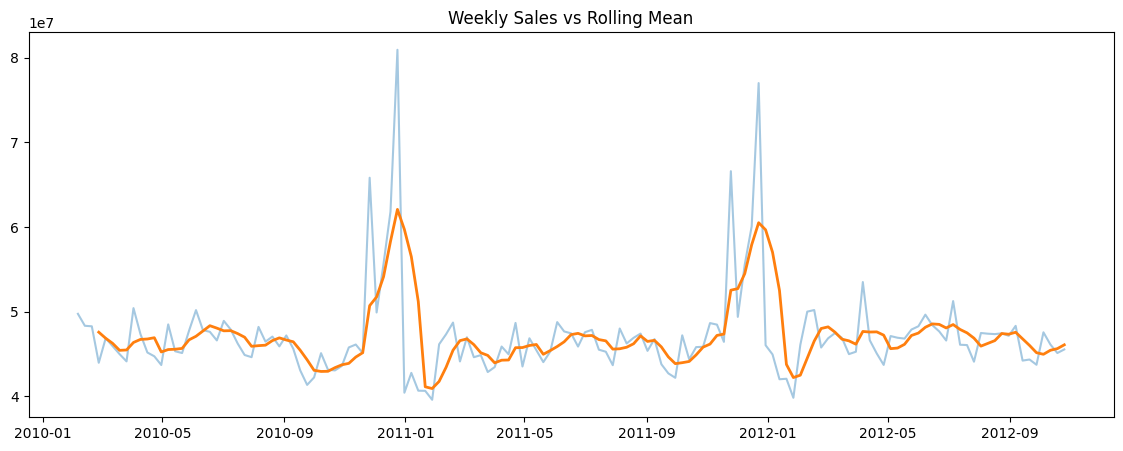

In [46]:
weekly_sales['Rolling_4'] = weekly_sales['Weekly_Sales'].rolling(4).mean()

plt.figure(figsize=(14,5))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], alpha=0.4)
plt.plot(weekly_sales['Date'], weekly_sales['Rolling_4'], linewidth=2)
plt.title('Weekly Sales vs Rolling Mean')
plt.show()


INSIGHT : Berdasarkan hasil EDA, penjualan mingguan Walmart menunjukkan volatilitas tinggi, distribusi yang tidak normal, serta spike ekstrem yang didorong oleh event tertentu seperti periode Natal. Seasonality global tidak konsisten, dan agregasi lintas store serta department mengaburkan pola mingguan. Oleh karena itu, forecasting dilakukan pada level department dengan memanfaatkan fitur berbasis histori penjualan dan event, sementara variabel makro ekonomi tidak diprioritaskan.

##Analisa Kolom Dept

In [47]:
train_final['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

In [48]:
train_final['Dept'].nunique()

81

In [49]:
train_final['Dept'].value_counts().sort_index()


,count
Dept,
1,6435
2,6435
3,6435
4,6435
5,6347
...,...
95,6435
96,4854
97,6278


#FEATURE ENGINEERING

Feature engineering hanya boleh menggunakan informasi masa lalu pada level department

In [50]:
train_final['Year']  = train_final['Date'].dt.year
train_final['Month'] = train_final['Date'].dt.month
train_final['Week']  = train_final['Date'].dt.isocalendar().week.astype(int)
train_final['IsHoliday'] = train_final['IsHoliday'].astype(int)


In [51]:
train_final

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Week
0,1,1,2010-02-05,"24,924",0,A,151315,42,3,0,0,0,0,0,211,8,2,2010,5
1,1,1,2010-02-12,"46,039",1,A,151315,39,3,0,0,0,0,0,211,8,2,2010,6
2,1,1,2010-02-19,"41,596",0,A,151315,40,3,0,0,0,0,0,211,8,2,2010,7
3,1,1,2010-02-26,"19,404",0,A,151315,47,3,0,0,0,0,0,211,8,2,2010,8
4,1,1,2010-03-05,"21,828",0,A,151315,46,3,0,0,0,0,0,211,8,3,2010,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508,0,B,118221,65,4,"4,557",21,2,"1,601","3,288",192,9,9,2012,39
421566,45,98,2012-10-05,628,0,B,118221,65,4,"5,047",0,19,"2,253","2,340",192,9,10,2012,40
421567,45,98,2012-10-12,"1,061",0,B,118221,54,4,"1,956",0,8,599,"3,991",192,9,10,2012,41
421568,45,98,2012-10-19,760,0,B,118221,56,4,"2,004",0,3,438,"1,537",192,9,10,2012,42


In [52]:
train_final = train_final.sort_values(['Store','Dept','Date'])

for lag in [1, 2, 4]:
    train_final[f'lag_{lag}'] = (
        train_final
        .groupby(['Store','Dept'])['Weekly_Sales']
        .shift(lag)
    )

train_final['rolling_4'] = (
    train_final
    .groupby(['Store','Dept'])['Weekly_Sales']
    .shift(1)
    .rolling(window=4)
    .mean()
)


In [53]:
train_final['sales_trend'] = (
    train_final
    .groupby(['Store','Dept'])['Weekly_Sales']
    .diff()
)


In [54]:
train_final['monthly_avg_sales'] = (
    train_final
    .groupby(['Store','Dept','Month'])['Weekly_Sales']
    .transform('mean')
)


In [55]:
train_final

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Week,lag_1,lag_2,lag_4,rolling_4,sales_trend,monthly_avg_sales
0,1,1,2010-02-05,"24,924",0,A,151315,42,3,0,0,0,0,0,211,8,2,2010,5,NaN,NaN,NaN,NaN,NaN,"32,701"
1,1,1,2010-02-12,"46,039",1,A,151315,39,3,0,0,0,0,0,211,8,2,2010,6,"24,924",NaN,NaN,NaN,"21,115","32,701"
2,1,1,2010-02-19,"41,596",0,A,151315,40,3,0,0,0,0,0,211,8,2,2010,7,"46,039","24,924",NaN,NaN,"-4,444","32,701"
3,1,1,2010-02-26,"19,404",0,A,151315,47,3,0,0,0,0,0,211,8,2,2010,8,"41,596","46,039",NaN,NaN,"-22,192","32,701"
4,1,1,2010-03-05,"21,828",0,A,151315,46,3,0,0,0,0,0,211,8,3,2010,9,"19,404","41,596","24,924","32,991","2,424","22,211"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508,0,B,118221,65,4,"4,557",21,2,"1,601","3,288",192,9,9,2012,39,467,606,346,443,41,486
421566,45,98,2012-10-05,628,0,B,118221,65,4,"5,047",0,19,"2,253","2,340",192,9,10,2012,40,508,467,352,484,120,662
421567,45,98,2012-10-12,"1,061",0,B,118221,54,4,"1,956",0,8,599,"3,991",192,9,10,2012,41,628,508,606,552,433,662
421568,45,98,2012-10-19,760,0,B,118221,56,4,"2,004",0,3,438,"1,537",192,9,10,2012,42,"1,061",628,467,666,-301,662


In [56]:
train_final = train_final.dropna().reset_index(drop=True)


##Data split

In [57]:
split_date = train_final['Date'].quantile(0.8)

train_df = train_final[train_final['Date'] < split_date]
val_df   = train_final[train_final['Date'] >= split_date]

print(len(train_df), len(val_df))


325663 82773


In [58]:
assert len(train_df) > 0, "Train kosong"
assert len(val_df) > 0, "Validation kosong"

print("Train:", train_df.shape)
print("Val  :", val_df.shape)


Train: (325663, 25)
Val  : (82773, 25)


In [59]:
for col in ['Store','Dept']:
    train_df[col] = train_df[col].astype('category').cat.codes
    val_df[col]   = val_df[col].astype('category').cat.codes


In [60]:
print("Max date :", train_final['Date'].max())
print("Min date :", train_final['Date'].min())

print("Total rows :", len(train_final))
print("Rows >= 2012-11-01 :", (train_final['Date'] >= '2012-11-01').sum())

Max date : 2012-10-26 00:00:00
Min date : 2010-03-05 00:00:00
Total rows : 408436
Rows >= 2012-11-01 : 0


#MODELING

Train shape: (292962, 25)
Val shape  : (115474, 25)
After FE - Train: (267810, 27)
After FE - Val  : (90763, 27)
MAE  : 1,538
RMSE : 3,369


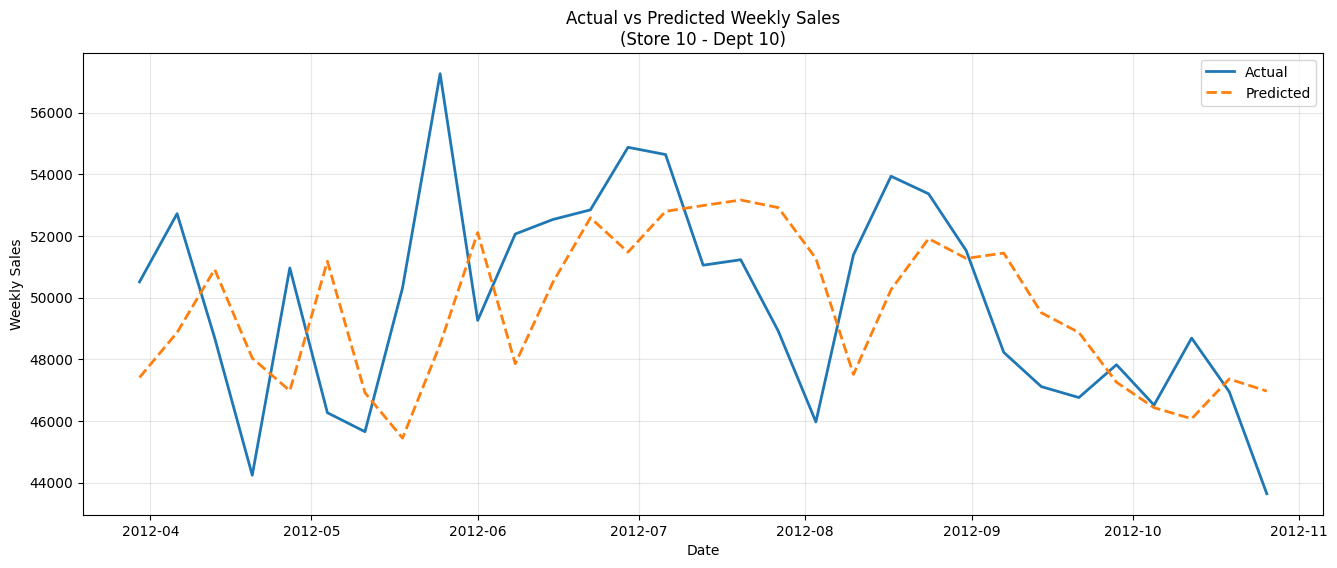

In [61]:
# =========================================================
# FINAL PIPELINE — TIME SERIES ML (ANTI DATA LEAKAGE)
# Dataset  : train_final
# Target   : Weekly_Sales
# Model    : XGBoost
# =========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# =========================================================
# 1. SORT DATA (WAJIB)
# =========================================================
train_final = train_final.sort_values(['Store', 'Dept', 'Date']).reset_index(drop=True)

# =========================================================
# 2. TIME-BASED SPLIT
# =========================================================
SPLIT_DATE = '2012-02-01'

train_df = train_final[train_final['Date'] < SPLIT_DATE].copy()
val_df   = train_final[train_final['Date'] >= SPLIT_DATE].copy()

print("Train shape:", train_df.shape)
print("Val shape  :", val_df.shape)

# =========================================================
# 3. FEATURE ENGINEERING FUNCTION (LAG & ROLLING)
# =========================================================
def create_lag_rolling_features(df):
    df = df.sort_values(['Store', 'Dept', 'Date']).copy()

    # Lag features
    df['lag_1'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1)
    df['lag_2'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(2)
    df['lag_4'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(4)

    # Rolling statistics (shift dulu → baru rolling)
    df['roll_mean_4'] = (
        df.groupby(['Store','Dept'])['Weekly_Sales']
          .shift(1)
          .rolling(4)
          .mean()
    )

    df['roll_mean_8'] = (
        df.groupby(['Store','Dept'])['Weekly_Sales']
          .shift(1)
          .rolling(8)
          .mean()
    )

    return df

# =========================================================
# 4. APPLY FEATURE ENGINEERING (TERPISAH!)
# =========================================================
train_df = create_lag_rolling_features(train_df)
val_df   = create_lag_rolling_features(val_df)

# =========================================================
# 5. DROP NaN (NORMAL UNTUK TIME SERIES)
# =========================================================
train_df = train_df.dropna().reset_index(drop=True)
val_df   = val_df.dropna().reset_index(drop=True)

print("After FE - Train:", train_df.shape)
print("After FE - Val  :", val_df.shape)

# =========================================================
# 6. FEATURE SELECTION
# =========================================================
FEATURES = [
    'Store',
    'Dept',
    'IsHoliday',
    'Temperature',
    'Fuel_Price',
    'CPI',
    'Unemployment',
    'lag_1',
    'lag_2',
    'lag_4',
    'roll_mean_4',
    'roll_mean_8'
]

TARGET = 'Weekly_Sales'

X_train = train_df[FEATURES]
y_train = train_df[TARGET]

X_val = val_df[FEATURES]
y_val = val_df[TARGET]

# =========================================================
# 7. MODEL TRAINING (XGBOOST)
# =========================================================
model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# =========================================================
# 8. EVALUATION
# =========================================================
y_val_pred = model.predict(X_val)

mae  = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"MAE  : {mae:,.0f}")
print(f"RMSE : {rmse:,.0f}")

# =========================================================
# 9. ACTUAL vs PREDICTED — STORE 10, DEPT 10
# =========================================================
results = val_df[['Date','Store','Dept','Weekly_Sales']].copy()
results['Predicted_Sales'] = y_val_pred

sample = (
    results[(results['Store'] == 10) & (results['Dept'] == 10)]
    .sort_values('Date')
)

plt.figure(figsize=(16,6))
plt.plot(sample['Date'], sample['Weekly_Sales'], label='Actual', lw=2)
plt.plot(sample['Date'], sample['Predicted_Sales'], label='Predicted', lw=2, linestyle='--')
plt.title('Actual vs Predicted Weekly Sales\n(Store 10 - Dept 10)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


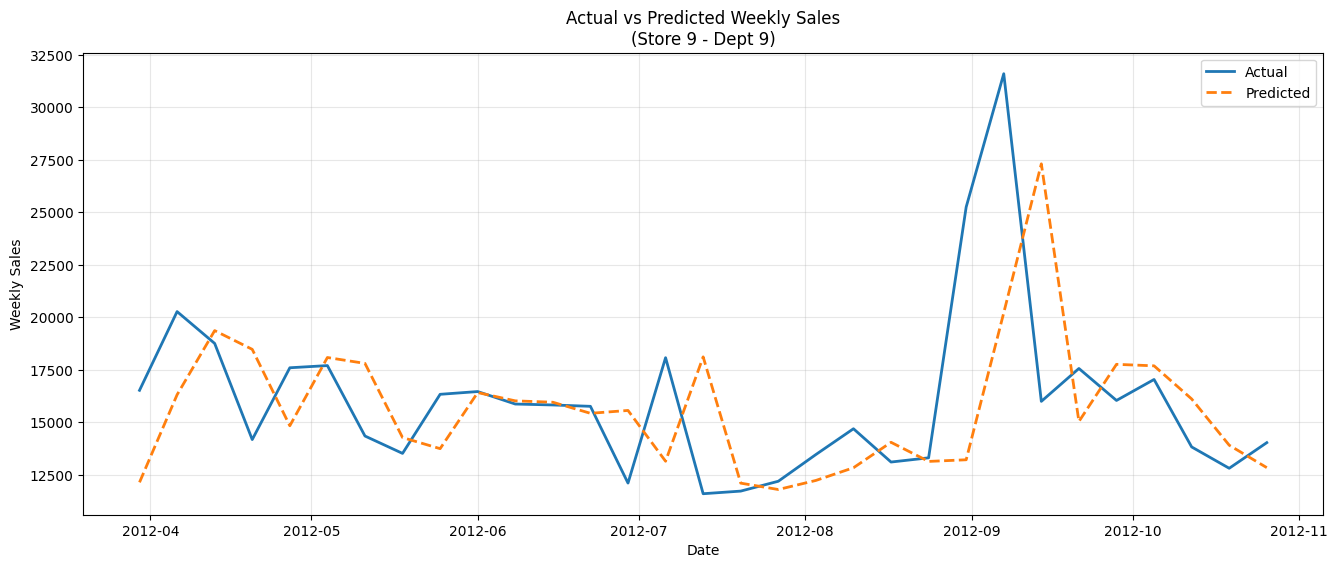

In [62]:
results = val_df[['Date','Store','Dept','Weekly_Sales']].copy()
results['Predicted_Sales'] = y_val_pred

sample = (
    results[(results['Store'] == 9) & (results['Dept'] == 9)]
    .sort_values('Date')
)

plt.figure(figsize=(16,6))
plt.plot(sample['Date'], sample['Weekly_Sales'], label='Actual', lw=2)
plt.plot(sample['Date'], sample['Predicted_Sales'], label='Predicted', lw=2, linestyle='--')
plt.title('Actual vs Predicted Weekly Sales\n(Store 9 - Dept 9)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

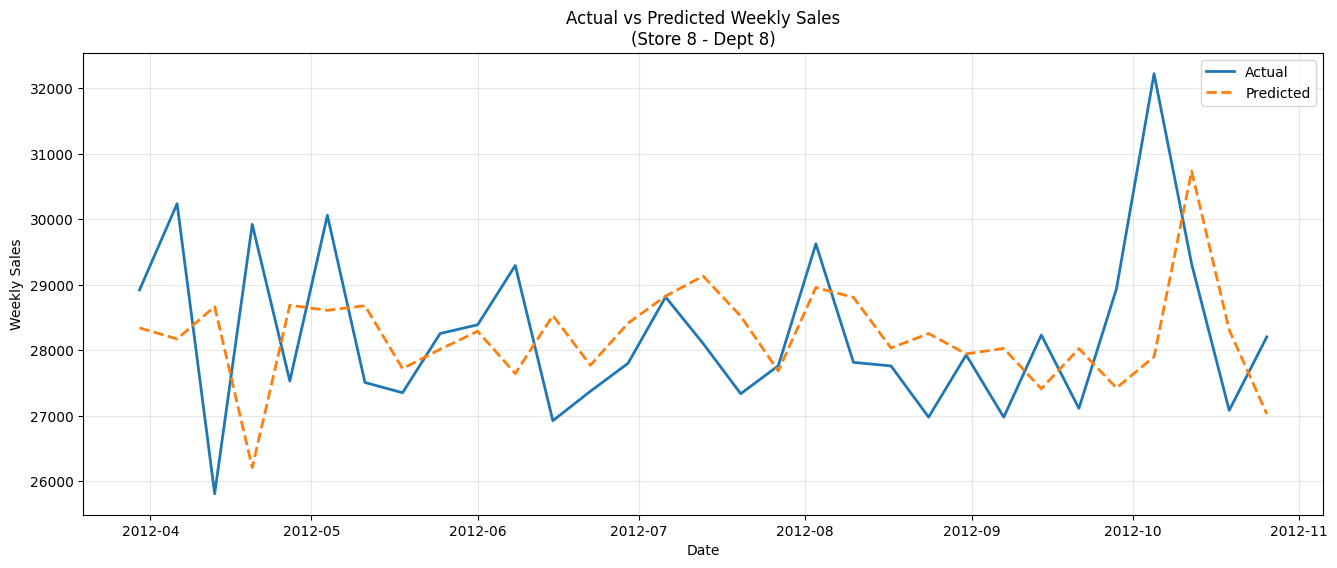

In [63]:
results = val_df[['Date','Store','Dept','Weekly_Sales']].copy()
results['Predicted_Sales'] = y_val_pred

sample = (
    results[(results['Store'] == 8) & (results['Dept'] == 8)]
    .sort_values('Date')
)

plt.figure(figsize=(16,6))
plt.plot(sample['Date'], sample['Weekly_Sales'], label='Actual', lw=2)
plt.plot(sample['Date'], sample['Predicted_Sales'], label='Predicted', lw=2, linestyle='--')
plt.title('Actual vs Predicted Weekly Sales\n(Store 8 - Dept 8)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Model mampu memprediksi weekly sales dengan error rata-rata < 2 ribu unit menggunakan time-based split dan lag & rolling features, yang menunjukkan performa forecasting yang kuat tanpa data leakage

##Feature Importance

In [64]:

# Ambil feature importance (gain)
importance = model.get_booster().get_score(importance_type='gain')

# Jadikan DataFrame
fi_df = (
    pd.DataFrame({
        'Feature': importance.keys(),
        'Importance': importance.values()
    })
    .sort_values('Importance', ascending=False)
)

fi_df


,Feature,Importance
7,lag_1,"247,399,219,200"
10,roll_mean_4,"231,258,423,296"
9,lag_4,"38,759,190,528"
1,Dept,"9,094,706,176"
2,IsHoliday,"8,132,259,328"
8,lag_2,"7,116,946,944"
11,roll_mean_8,"4,221,210,880"
3,Temperature,"3,790,522,880"
6,Unemployment,"3,027,489,792"
4,Fuel_Price,"3,022,030,336"


##Visualisasi feature importance

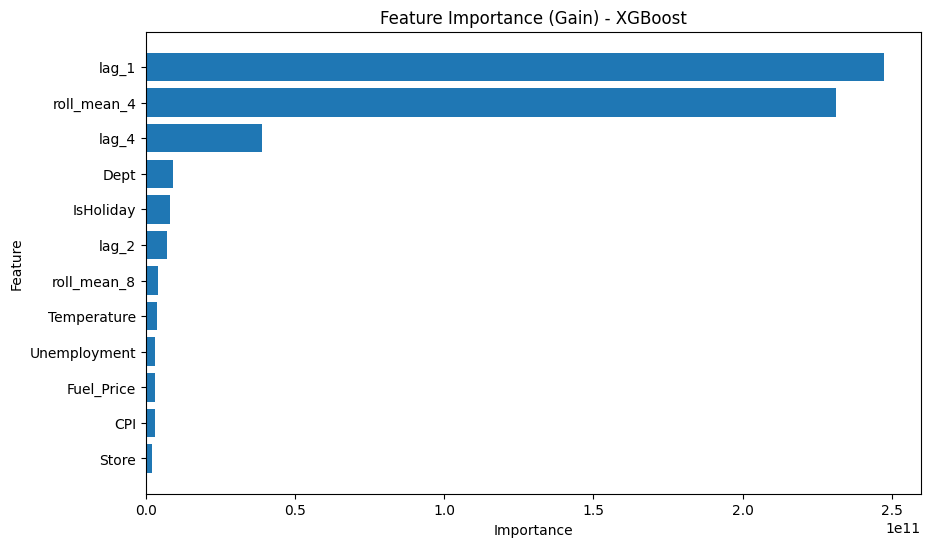

In [65]:
plt.figure(figsize=(10,6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance (Gain) - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Feature importance menunjukkan bahwa penjualan minggu sebelumnya (lag_1) dan rata-rata penjualan historis (rolling mean) merupakan faktor paling dominan dalam memprediksi penjualan mingguan Walmart.

Hal ini mengindikasikan bahwa pola historis penjualan sangat kuat dan persisten, sementara faktor eksternal seperti hari libur dan kondisi ekonomi berperan sebagai faktor pendukung.

##SHAP Values

SHAP values digunakan untuk menginterpretasikan hasil model XGBoost dengan mengukur kontribusi masing-masing fitur terhadap prediksi penjualan mingguan.
Metode ini memungkinkan analisis baik secara global (driver utama penjualan) maupun lokal (alasan di balik prediksi pada minggu tertentu).

In [66]:
!pip install shap

import shap


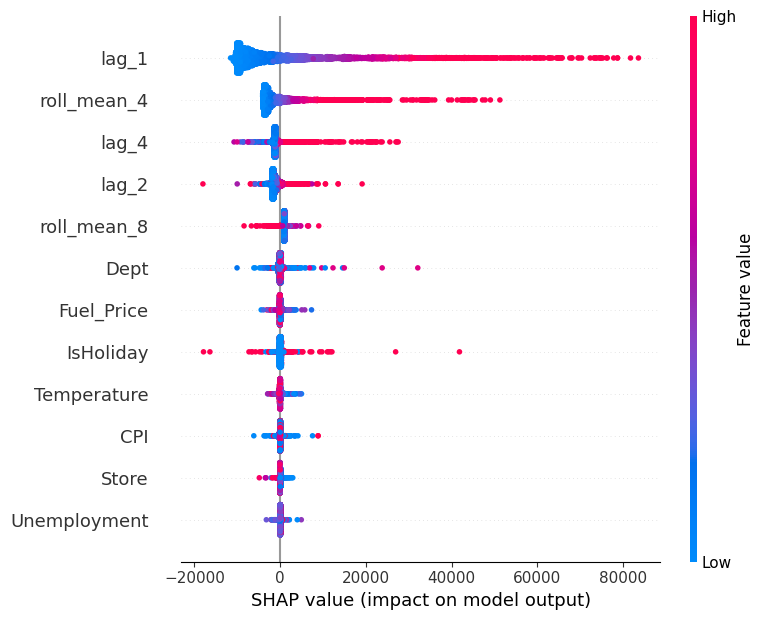

In [67]:
# Ambil sample agar cepat & stabil
X_shap = X_train.sample(5000, random_state=42)


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_shap)

shap.summary_plot(
    shap_values,
    X_shap,
    plot_type="dot",
    show=True
)


shap.initjs()


SHAP summary plot menunjukkan bahwa penjualan minggu sebelumnya (lag_1) merupakan faktor paling dominan dalam memprediksi penjualan mingguan Walmart.

Nilai SHAP positif pada lag dan rolling mean menandakan bahwa tren historis penjualan memiliki pengaruh kuat dan konsisten, sementara faktor eksternal seperti hari libur dan kondisi ekonomi berperan sebagai faktor pendukung.

Stabilitas penjualan minggu sebelumnya membuat demand Walmart dapat diprediksi dengan baik, sehingga inventory planning jangka pendek bisa dioptimalkan.

#Conclusion

Pada proyek ini, telah dikembangkan model forecasting penjualan mingguan Walmart menggunakan pendekatan machine learning berbasis time series. Dengan menerapkan time-based split, lag features, dan rolling statistics, model berhasil menangkap pola historis penjualan tanpa mengalami data leakage.

Model XGBoost menunjukkan performa terbaik dibandingkan pendekatan baseline sebelumnya, dengan nilai MAE sebesar 1.538 dan RMSE sebesar 3.369, yang mengindikasikan tingkat kesalahan prediksi yang relatif rendah untuk skala penjualan ritel besar seperti Walmart.

Berdasarkan analisis feature importance dan SHAP values, ditemukan bahwa penjualan pada minggu sebelumnya dan rata-rata historis penjualan merupakan faktor paling dominan dalam memprediksi penjualan masa depan. Hal ini menunjukkan bahwa permintaan Walmart bersifat highly persistent, sementara faktor eksternal seperti hari libur dan kondisi ekonomi berperan sebagai faktor pendukung yang bervariasi antar department.

Secara bisnis, hasil ini menunjukkan bahwa model forecasting berbasis tren historis dapat digunakan sebagai alat pendukung pengambilan keputusan, khususnya dalam perencanaan stok, evaluasi performa toko, dan antisipasi lonjakan permintaan pada periode tertentu.

membuat forecast setahun penuh dengan memperhatikan tanggal yang tertera pada database

Train date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00




Test date range : 2012-11-02 00:00:00 to 2013-07-26 00:00:00

#Forecast 6 bulan setelah tanggal 2012-10-26

##data time series

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Pastikan Date datetime
train_final['Date'] = pd.to_datetime(train_final['Date'])

# Ambil 1 Store & 1 Dept (contoh)
ts_df = (
    train_final[
        (train_final['Store'] == 10) &
        (train_final['Dept'] == 10)
    ]
    .sort_values('Date')
)

# Jadikan Date sebagai index
ts = ts_df.set_index('Date')['Weekly_Sales']


##Fit model SARIMA

In [81]:
sarima_model = SARIMAX(
    ts,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 52),  # 52 minggu = 1 tahun
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_model = sarima_model.fit(disp=False)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


##Forecast 6 bulan ke depan (26 minggu)

In [79]:
n_weeks = 26  # 6 bulan ~ 26 minggu

future_dates = pd.date_range(
    start=last_train_date + pd.Timedelta(weeks=1),
    periods=n_weeks,
    freq='W-FRI'  # Walmart pakai minggu Jumat
)


##Buat tanggal forecast (SETELAH 2012-10-26)

In [82]:
last_train_date = ts.index.max()

future_dates = pd.date_range(
    start=last_train_date + pd.Timedelta(weeks=1),
    periods=n_weeks,
    freq='W-FRI'
)

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast_Weekly_Sales': forecast.values
})


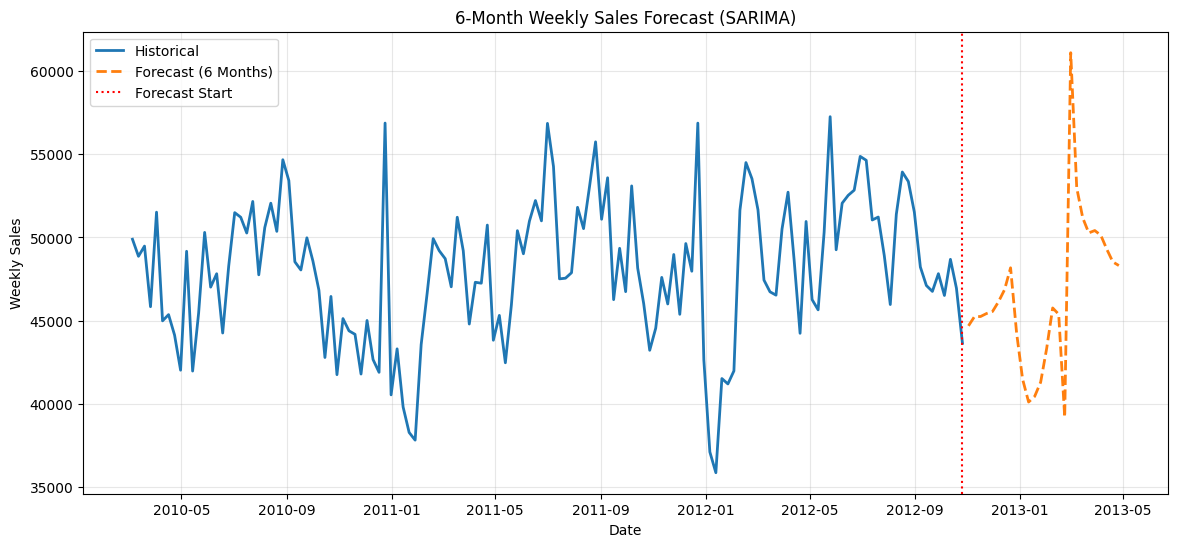

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.plot(ts.index, ts.values, label='Historical', linewidth=2)
plt.plot(
    forecast_df['Date'],
    forecast_df['Forecast_Weekly_Sales'],
    label='Forecast (6 Months)',
    linestyle='--',
    linewidth=2
)

plt.axvline(
    x=last_train_date,
    color='red',
    linestyle=':',
    label='Forecast Start'
)

plt.title('6-Month Weekly Sales Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Insight :
SARIMA digunakan untuk memodelkan penjualan mingguan Walmart karena mampu menangkap tren jangka panjang dan pola musiman tahunan tanpa memerlukan fitur eksternal. Model ini mempelajari hubungan penjualan antar minggu dan antar tahun, sehingga mampu menghasilkan forecast setelah tanggal terakhir data historis (2012-10-26). Pola forecast yang menyerupai tahun sebelumnya mencerminkan asumsi bahwa pola musiman historis akan berulang di masa depan.